In [ ]:



#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing package pandas (For Panel Data Analysis)
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------

#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface to use matplotlib
import seaborn as sns                                               # Importing Seaborn for statistical data visualization, built on top of Matplotlib.

import warnings
from rich import print
#-------------------------------------------------------------------------------------------------------------------------------
import warnings
warnings. filterwarnings("ignore")
#-----------------------------------------

In [ ]:

df = pd.read_csv(
    "dataProductivityEmployeese.csv",
)

In [ ]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8.0,0.80,26.16,1108.0,7080.0,98.0,0.0,NaN,0.0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1.0,0.75,3.94,NaN,960.0,0.0,0.0,0.0,0.0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11.0,0.80,11.41,968.0,3660.0,50.0,0.0,0.0,0.0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12.0,0.80,11.41,NaN,3660.0,50.0,0.0,0.0,0.0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6.0,NaN,25.90,1170.0,1920.0,50.0,0.0,0.0,0.0,56.0,0.800382


In [ ]:
df.tail()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1297,3/3/2015,Quarter1,finishing,Tuesday,2.0,0.4,3.90,NaN,6300.0,0.0,0.0,0.0,0.0,15.0,0.567378
1298,2/24/2015,Quarter4,finishing,Tuesday,9.0,0.7,2.90,NaN,1800.0,0.0,0.0,0.0,0.0,15.0,0.726933
1299,2/14/2015,Quarter2,sweing,Saturday,11.0,0.6,11.41,1039.0,2280.0,23.0,0.0,0.0,NaN,55.0,0.600448
1300,2/11/2015,Quarter2,finishing,Wednesday,12.0,0.8,4.08,NaN,1080.0,0.0,0.0,0.0,0.0,9.0,1.020000
1301,2/25/2015,Quarter4,sweing,Wednesday,4.0,0.8,30.10,323.0,4080.0,50.0,0.0,0.0,1.0,59.0,0.800809


In [ ]:
print('Data Shape:', df.shape)

Data Shape:
(1302, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1272 non-null   object 
 1   quarter                1279 non-null   object 
 2   department             1275 non-null   object 
 3   day                    1274 non-null   object 
 4   team                   1278 non-null   float64
 5   targeted_productivity  1279 non-null   float64
 6   smv                    1276 non-null   float64
 7   wip                    729 non-null    float64
 8   over_time              1276 non-null   float64
 9   incentive              1275 non-null   float64
 10  idle_time              1275 non-null   float64
 11  idle_men               1278 non-null   float64
 12  no_of_style_change     1279 non-null   float64
 13  no_of_workers          1280 non-null   float64
 14  actual_productivity    1267 non-null   float64
dtypes: f

In [ ]:

df['date']= pd.to_datetime(df['date'])

In [ ]:
df['wip'].fillna(value=0, inplace=True)

In [ ]:
def find_daterange(quarter):
    print('Dates between '+ df[df['quarter'] == quarter]['date'].min().strftime('%m/%d/%Y') +
          ' and ' + df[df['quarter'] == quarter]['date'].max().strftime('%m/%d/%Y') +
          ' in ' + quarter)

find_daterange('Quarter1')
find_daterange('Quarter2')
find_daterange('Quarter3')
find_daterange('Quarter4')
find_daterange('Quarter5')

Dates between 01/01/2015 and 03/07/2015 in Quarter1

Dates between 01/08/2015 and 03/11/2015 in Quarter2

Dates between 01/15/2015 and 02/19/2015 in Quarter3

Dates between 01/22/2015 and 02/28/2015 in Quarter4

Dates between 01/29/2015 and 01/31/2015 in Quarter5

In [ ]:
# Ensure dates are sorted in ascending order
df = df.sort_values(by='date').reset_index(drop=True)

In [ ]:

# Fill missing 'department' values based on the 'wip' conditions
df['department'] = df.apply(lambda row: 'finishing' if row['wip'] == 0 else 'sewing' if pd.isna(row['department']) and row['wip'] > 0 else row['department'], axis=1)

In [ ]:

# Remove rows where 'date' column has NaN values
df = df.dropna(subset=['date'])


In [ ]:
# Loop through the DataFrame to fill NaN values in the 'quarter' column
for i in range(1, len(df) - 1):
    # Check if the current 'quarter' is NaN
    if pd.isna(df.loc[i, 'quarter']):
        # Get previous and next quarters
        previous_quarter = df.loc[i - 1, 'quarter']
        next_quarter = df.loc[i + 1, 'quarter']

        # Get previous and next dates
        previous_date = df.loc[i - 1, 'date']
        next_date = df.loc[i + 1, 'date']

        # Check if both previous and next quarters match
        # and if the month and day are the same for previous and next dates
        if (previous_quarter == next_quarter and
            previous_date.month == next_date.month and
            previous_date.day == next_date.day):

            # Set the current NaN to the matching quarter
            df.loc[i, 'quarter'] = previous_quarter

In [ ]:

# Remove rows where 'quarter' column has NaN values
df = df.dropna(subset=['quarter'])

In [ ]:
# Loop through the DataFrame to fill NaN values in the 'day' column
for i in range(1, len(df) - 1):
    # Check if the current 'day' is NaN
    if pd.isna(df.iloc[i]['day']):
        # Get previous and next dates
        previous_date = df.iloc[i - 1]['date']
        next_date = df.iloc[i + 1]['date']

        # Check if the previous date and next date are the same
        if previous_date.date() == next_date.date():
            # Fill the NaN with the day from the previous row (or next row, as they should be the same)
            df.iloc[i, df.columns.get_loc('day')] = df.iloc[i - 1]['day']  # You can also use df.iloc[i + 1]['day']

In [ ]:
# Remove rows where 'dat' column has NaN values
df = df.dropna(subset=['day'])

In [ ]:
# Define a function to fill NaN values based on the conditions
def fill_idle_columns(row):
    # If both idle_time and idle_men are NaN, set both to 0
    if pd.isna(row['idle_time']) and pd.isna(row['idle_men']):
        row['idle_time'] = 0
        row['idle_men'] = 0

    if pd.isna(row['idle_time']):
        # Fill idle_time based on idle_men
        if row['idle_men'] == 0:
            row['idle_time'] = 0

    if pd.isna(row['idle_men']):
        # Fill idle_men based on idle_time
        if row['idle_time'] == 0:
            row['idle_men'] = 0

    return row

# Apply the function to each row of the DataFrame
df = df.apply(fill_idle_columns, axis=1)

In [ ]:

# Convert NaN values in 'incentive' column to 0
df['incentive'] = df['incentive'].fillna(0)

In [ ]:
# Convert NaN values in 'over_time' column to 0
df['over_time'] = df['over_time'].fillna(0)

In [ ]:
# Delete rows where 'no_of_workers' is null
df = df.dropna(subset=['no_of_workers'])

In [ ]:
# Delete rows where 'team' is null
df = df.dropna(subset=['team'])

In [ ]:
# Function to set 'no_of_style_change' based on 'smv'
def set_no_of_style_change(row):
    if pd.isna(row['no_of_style_change']) and pd.notna(row['smv']):
        if row['smv'] == 11.41:
            return 2
        elif row['smv'] == 30.1:
            return 1
    return row['no_of_style_change']

# Apply the function to the DataFrame
df['no_of_style_change'] = df.apply(set_no_of_style_change, axis=1)

In [ ]:
# Delete rows where 'no_of_style_change' is null
df = df.dropna(subset=['no_of_style_change'])

In [ ]:

# Delete rows where 'smv' is null
df = df.dropna(subset=['smv'])

In [ ]:

#to deal with the anomalies above, the figures will be truncated

df['no_of_workers'] = df['no_of_workers'].apply(lambda x: int(x))

# Convert 'actual_productivity' to float
df['actual_productivity'] = df['actual_productivity'].astype(float)

# Format 'actual_productivity' to display 9 decimal places
df['actual_productivity'] = df['actual_productivity'].apply(lambda x: f"{x:.9f}")

In [ ]:
# Delete rows where 'actual_productivity' is null
df = df.dropna(subset=['actual_productivity'])

In [ ]:
# Delete rows where 'targeted_productivity' is null
df = df.dropna(subset=['targeted_productivity'])

In [ ]:
df['department'] = df['department'].str.replace("sweing", "sewing")

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1153 entries, 0 to 1271
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1153 non-null   datetime64[ns]
 1   quarter                1153 non-null   object        
 2   department             1153 non-null   object        
 3   day                    1153 non-null   object        
 4   team                   1153 non-null   float64       
 5   targeted_productivity  1153 non-null   float64       
 6   smv                    1153 non-null   float64       
 7   wip                    1153 non-null   float64       
 8   over_time              1153 non-null   float64       
 9   incentive              1153 non-null   float64       
 10  idle_time              1153 non-null   float64       
 11  idle_men               1153 non-null   float64       
 12  no_of_style_change     1153 non-null   float64       
 13  no_of_wo

In [ ]:

#checking for missing values
df.isnull().sum()


,0
date,0
quarter,0
department,0
day,0
team,0
targeted_productivity,0
smv,0
wip,0
over_time,0
incentive,0


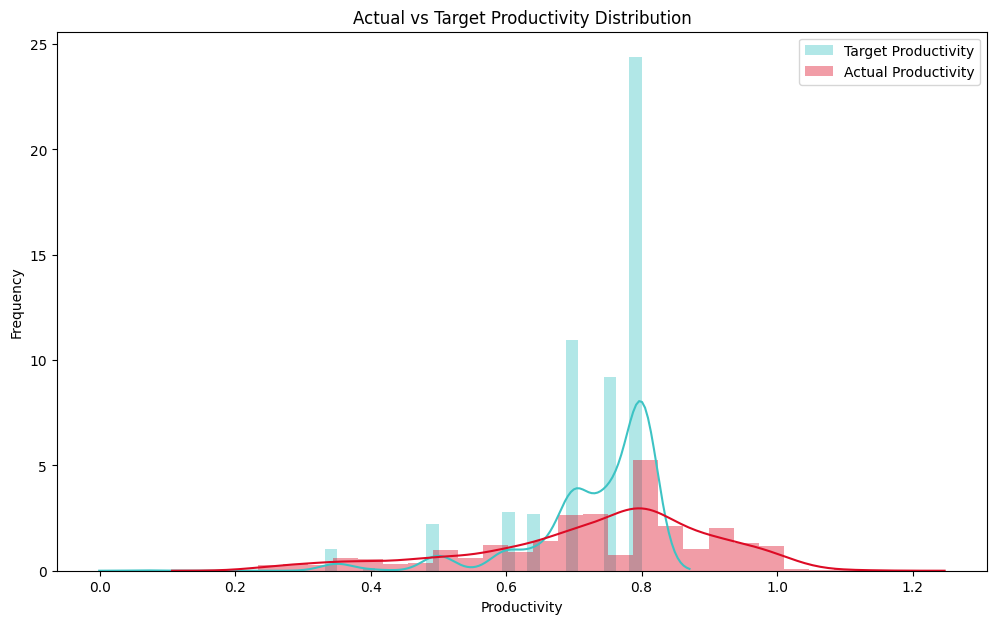

In [ ]:
fig,ax =plt.subplots(figsize=(12, 7))
sns.set_color_codes("dark")
sns.set_palette(sns.color_palette("deep"))
sns.distplot(df["targeted_productivity"] , label='Target Productivity' , color="#3dc3c4");
sns.distplot(df["actual_productivity"] , label='Actual Productivity' , color="#dd0b25");
plt.xlabel('Productivity')
plt.ylabel('Frequency')
plt.title('Actual vs Target Productivity Distribution')
plt.legend()

Text(0, 0.5, '')

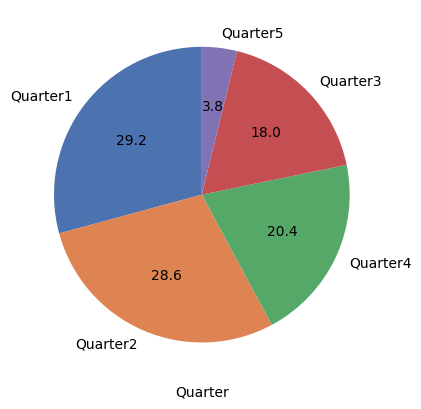

In [ ]:

df['quarter'].value_counts().plot(kind='pie',startangle=90,autopct='%.1f')
plt.xlabel('Quarter')
plt.ylabel('')

In [ ]:

#separating variables for ease of analysis to those that can
#be considered continuous and categorical
cat = ["quarter", "department", "day", "team", "no_of_style_change"]
contin = ["targeted_productivity", "smv", "wip", "over_time", "idle_men", "incentive", "idle_time", "no_of_workers", "actual_productivity"]

In [ ]:

#checking for anomalies

for col in cat:
  print(col)
  print(df[col].unique())


  print('\n')

quarter

['Quarter1' 'Quarter2' 'Quarter3' 'Quarter4' 'Quarter5']

department

['sewing' 'finishing']

day

['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']

team

[ 8. 11.  4.  7. 10.  5.  9.  2.  3. 12.  1.  6.]

no_of_style_change

[0. 1. 2.]

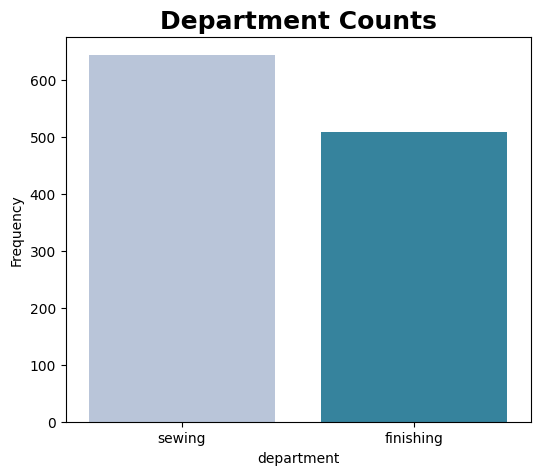

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.countplot(x='department', data=df, order=df['department'].value_counts().index, palette="PuBuGn")
plt.title("Department Counts", fontsize=18, fontweight="bold")
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Removing the word Quarter from the quarter column and leave the numbers
df['quarter'] = df['quarter'].str.replace('Quarter','')

# Changing the datatype to numeric
df['quarter'] = df['quarter'].astype(int)

#confirming changes
print(df.quarter.unique())
print(df.quarter.dtype)

[1 2 3 4 5]

int64

In [ ]:
# Correcting the spelling of sewing in the department column
df['department'] = df['department'].str.replace('sweing','sewing')

# Removing the spacing from the word finishing in the department column
df['department'] = df['department'].str.replace('finishing ','finishing')

#confirming changes
df['department'].unique()

array(['sewing', 'finishing'], dtype=object)

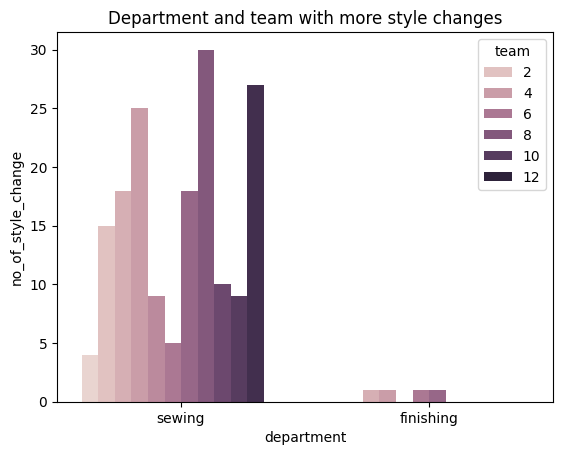

In [ ]:


#Department and team with more style changes

sns.barplot(x='department', y='no_of_style_change',hue ='team' ,data=df, ci= None, estimator=sum)
plt.title("Department and team with more style changes")
plt.show()

In [ ]:


#checking for columns with object datatype
for col in cat:
  if df[col].dtype == "object":
    print(col)

department

day

In [ ]:
#creating a copy of the dataframe
df_enc = df.copy()

In [ ]:


print(df.day.unique())
print(df.department.unique())

['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']

['sewing' 'finishing']

In [ ]:

#encoding
repl_dict = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday':2,
    'Thursday':3,
    'Saturday':4,
    'Sunday':5
}
df_enc['day'] = df_enc['day'].replace(repl_dict)

df_enc['department'] = df_enc['department'].replace({'sewing':0, 'finishing':1})

In [ ]:
# checking that the values were encoded
#
print(df_enc.department.unique())
print(df_enc.day.unique())

[0 1]

[3 4 5 0 1 2]

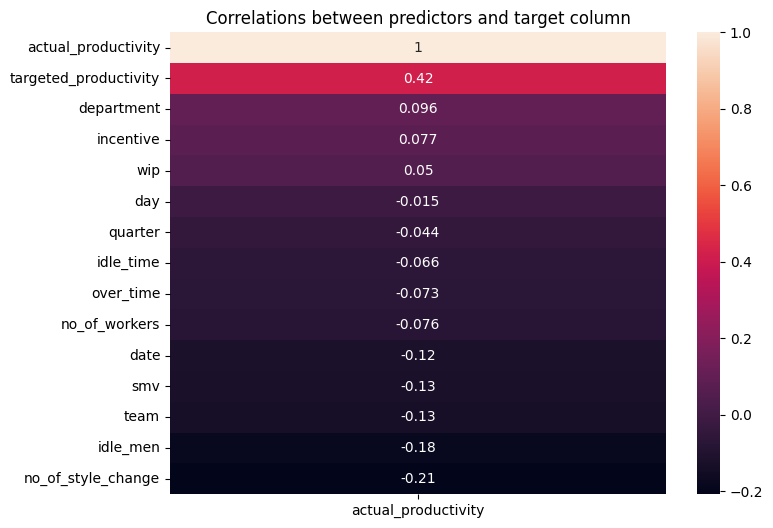

In [ ]:
#Correlation Heatmaps
#highlighting correlations specifically with target
corr = df_enc.corr()
target_col=corr[['actual_productivity']].sort_values(by='actual_productivity', ascending=False)

plt.figure(figsize=(8,6))

sns.heatmap(target_col,annot=True)
plt.title("Correlations between predictors and target column")
plt.show()

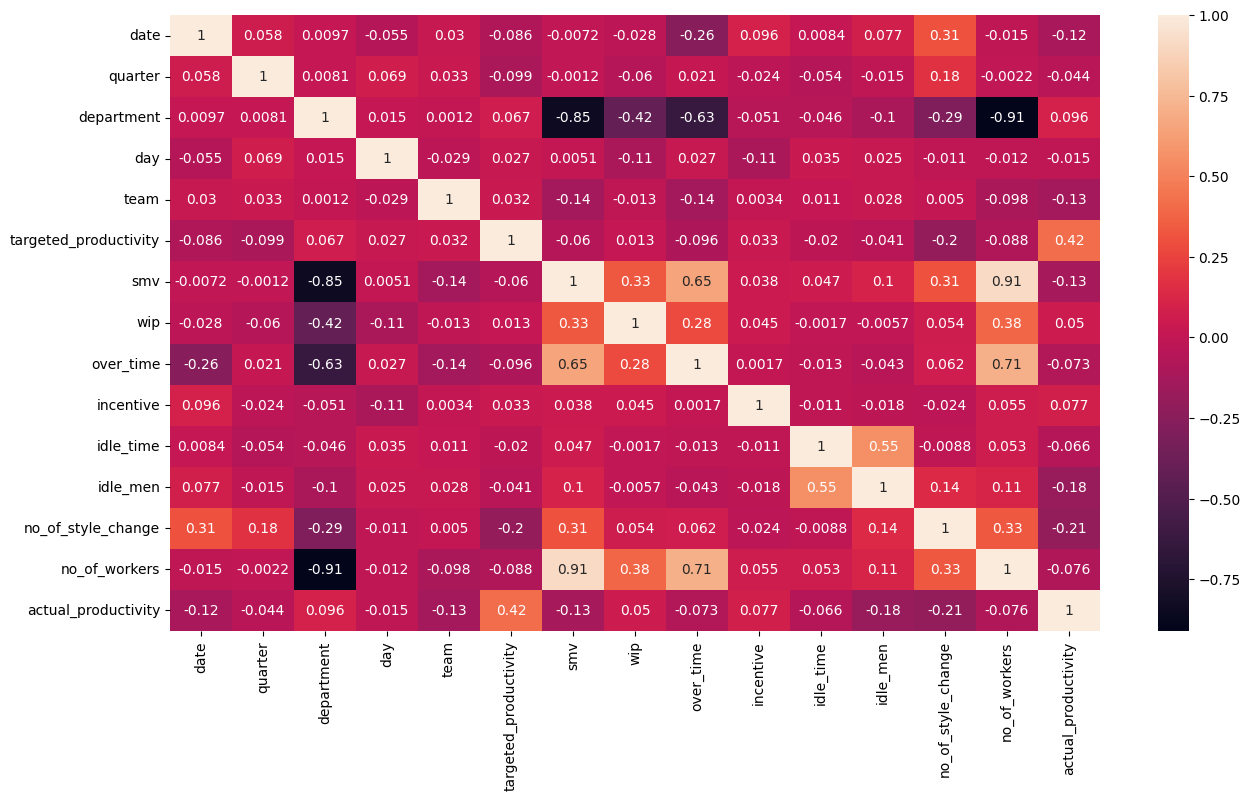

In [ ]:
#showing correlation on a heatmap

plt.figure(figsize=(15,8))
sns.heatmap(df_enc.corr(),annot=True)
plt.show()

In [ ]:
# from sklearn.model_selection import KFold
import scipy as sp
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

In [ ]:
#the aspects of the date of interest (quarter of the month and day of the week)
#are extracted, therefore will drop date column .

df_enc.drop(columns=['date'], inplace=True, axis=1)

#printing variables that will be used in modelling
print(df_enc.columns)

Index(['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

In [ ]:
#separating features and target for use in modelling

X = df_enc.drop(['actual_productivity'], axis=1)

y = df_enc['actual_productivity']

In [ ]:
# Splitting dataset to train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=0)

In [ ]:
#list with feature names
x_cols = X.columns
x_cols

Index(['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers'],
      dtype='object')

In [ ]:


#scaled features
#transforming test based on values obtained from train (scaler should only be
# fitted on train set then used to transform both train and test to prevent
# data leakage caused by fitting on entire dataset)

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [ ]:
# Convert y to numeric, coercing errors to NaN
y = pd.to_numeric(y, errors='coerce')

# Drop any NaN values that result from the conversion
y = y.dropna()

# Calculate and print mean and range
print("mean:", y.mean())
print("range:", y.max() - y.min())

mean: 0.7353522559019607

range: 0.886732024

In [ ]:


#list that will track rmses
rmses = []

In [ ]:


# Ensure y_train is numeric and convert invalid entries to NaN
y_train = pd.to_numeric(y_train, errors='coerce')

# Check for NaNs in y_train after conversion
print("NaN values in y_train after conversion:", y_train.isna().sum())

# Handle NaNs in y_train by filling or dropping them
y_train = y_train.fillna(y_train.mean())  # For example, replace NaNs with the mean

# Replacing NaNs with the mean of `y_test`
y_test = pd.to_numeric(y_test, errors='coerce')
y_test.fillna(y_test.mean(), inplace=True)









NaN values in y_train after conversion: 27

## Random Forest 	Ensemble (Bagging)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

#Fitting the model


forest = RandomForestRegressor(n_estimators = 100, random_state=0, min_samples_split = 20, max_depth=5)
forest.fit(X_train, y_train)

# predicting
y_pred = forest.predict(X_test)


#evaluating the model

mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))


print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

rmses.append(f'Random forest model 1 RMSE: {rmse}')

Mean Squared Error: 0.013107525307172328

Root Mean Squared Error: 0.11448810115978135

The first random forest model has the lowest rmse observed so far

In [ ]:
#using grid search to tune hyperparameters
#finding best parameter values from range below
parameters = {'n_estimators': np.arange(50, 500, 50),
              'min_samples_split': np.arange(5, 30, 5),
              'max_depth': np.arange(2,7)}
rforest = RandomForestRegressor(random_state=0)
#finding values
search = GridSearchCV(estimator=rforest,param_grid=parameters,scoring='neg_mean_squared_error')
search.fit(X_train,y_train)
print(search.best_params_)

{'max_depth': np.int64(6), 'min_samples_split': np.int64(5), 'n_estimators': np.int64(450)}

In [ ]:
#Fitting the model

forest = RandomForestRegressor(n_estimators = 50, random_state=0, min_samples_split = 10, max_depth=6)
forest.fit(X_train, y_train)

# predicting
y_pred = forest.predict(X_test)


#evaluating the model

mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

rmses.append(f'Rforest further tuned model RMSE: {rmse}')

Mean Squared Error: 0.012480020904996388

Root Mean Squared Error: 0.11171401391498019

In [ ]:

for x in rmses:
  print(f'\n{x}')

Random forest model 1 RMSE: 0.11448810115978135

Rforest further tuned model RMSE: 0.11171401391498019

After tuning the random forest further, lowest RMSE so far of 0.1236 is obtained.

## Gradient boosting  Ensemble (Boosting)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

#Fitting the model

gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.01, max_depth=5, random_state=0)
gbr.fit(X_train, y_train)

# Predict
y_pred = gbr.predict(X_test)


#evaluating the model
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))


print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

rmses.append(f'Gradient boosting model 1 RMSE: {rmse}')

Mean Squared Error: 0.015348060261487474

Root Mean Squared Error: 0.12388728853876606

In [ ]:

for x in rmses:
  print(f'\n{x}')

Random forest model 1 RMSE: 0.11448810115978135

Rforest further tuned model RMSE: 0.11171401391498019

Gradient boosting model 1 RMSE: 0.12388728853876606

## Clustering

## Kmeans

In [ ]:
# Import necessary libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [ ]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Determine the optimal number of clusters using the Elbow Method
wcss = []  # Within-Cluster Sum of Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

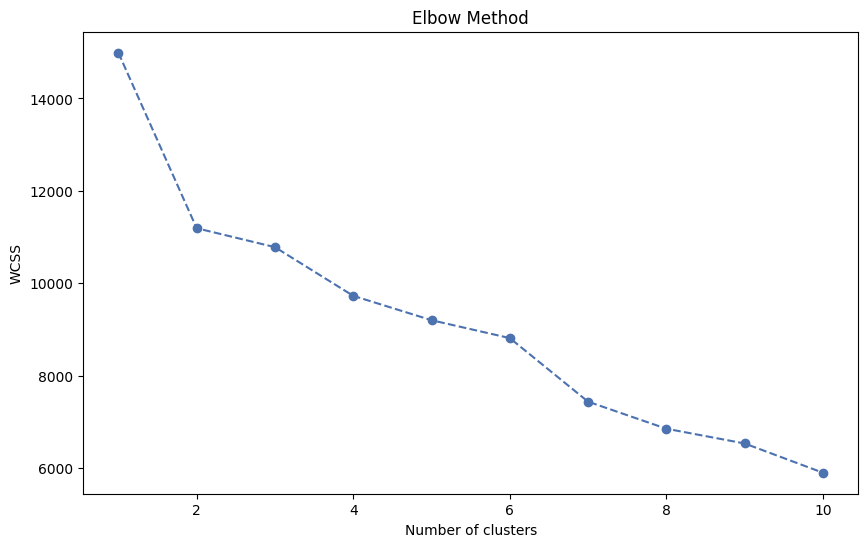

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Determine the optimal number of clusters using Silhouette Analysis
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

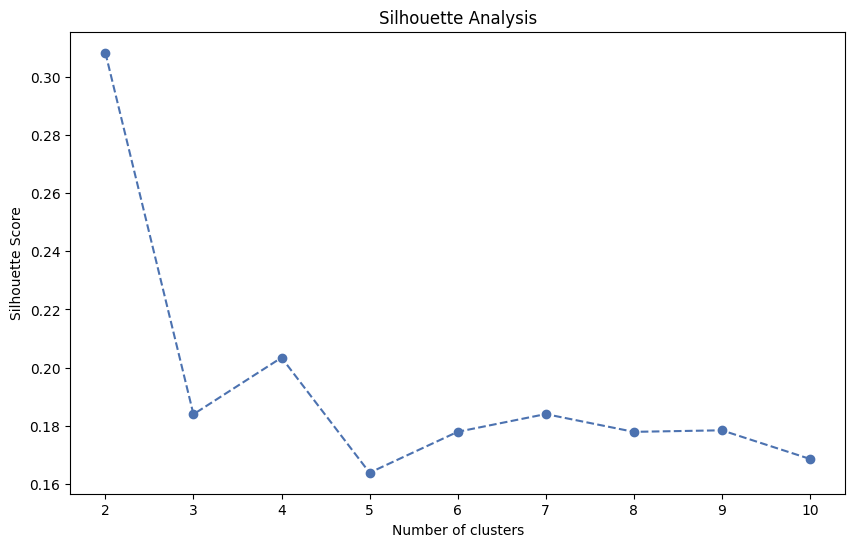

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Analysis')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
# Apply K-means clustering with the optimal number of clusters
optimal_clusters = 2  # optimal number of clusters determined from the above methods
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=2, random_state=42)

In [ ]:
# Add the cluster labels to the original dataframe
df['cluster'] = kmeans.labels_

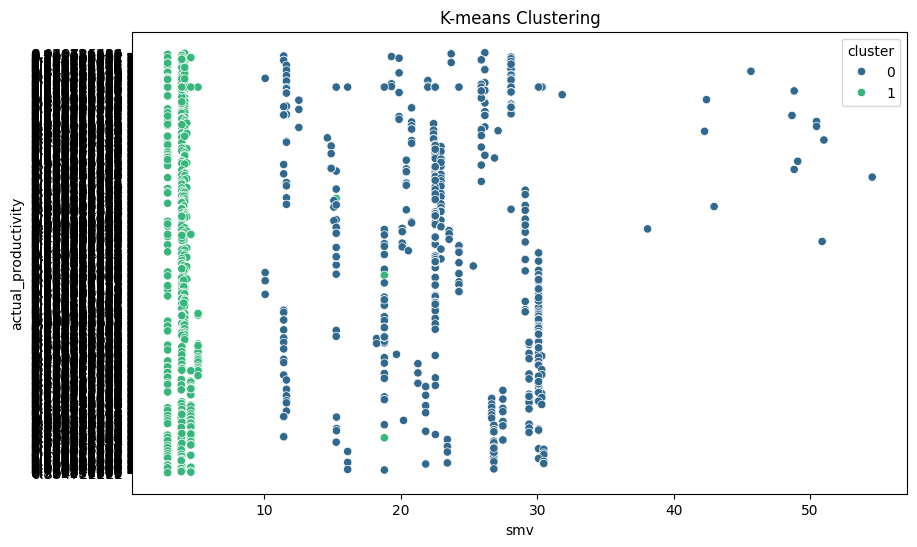

In [ ]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='smv', y='actual_productivity', hue='cluster', data=df, palette='viridis')
plt.title('K-means Clustering')
plt.show()

In [ ]:
# Evaluate the clusters
print('Silhouette Score:', silhouette_score(X_scaled, kmeans.labels_))

Silhouette Score: 0.3083158032877409

### CAH

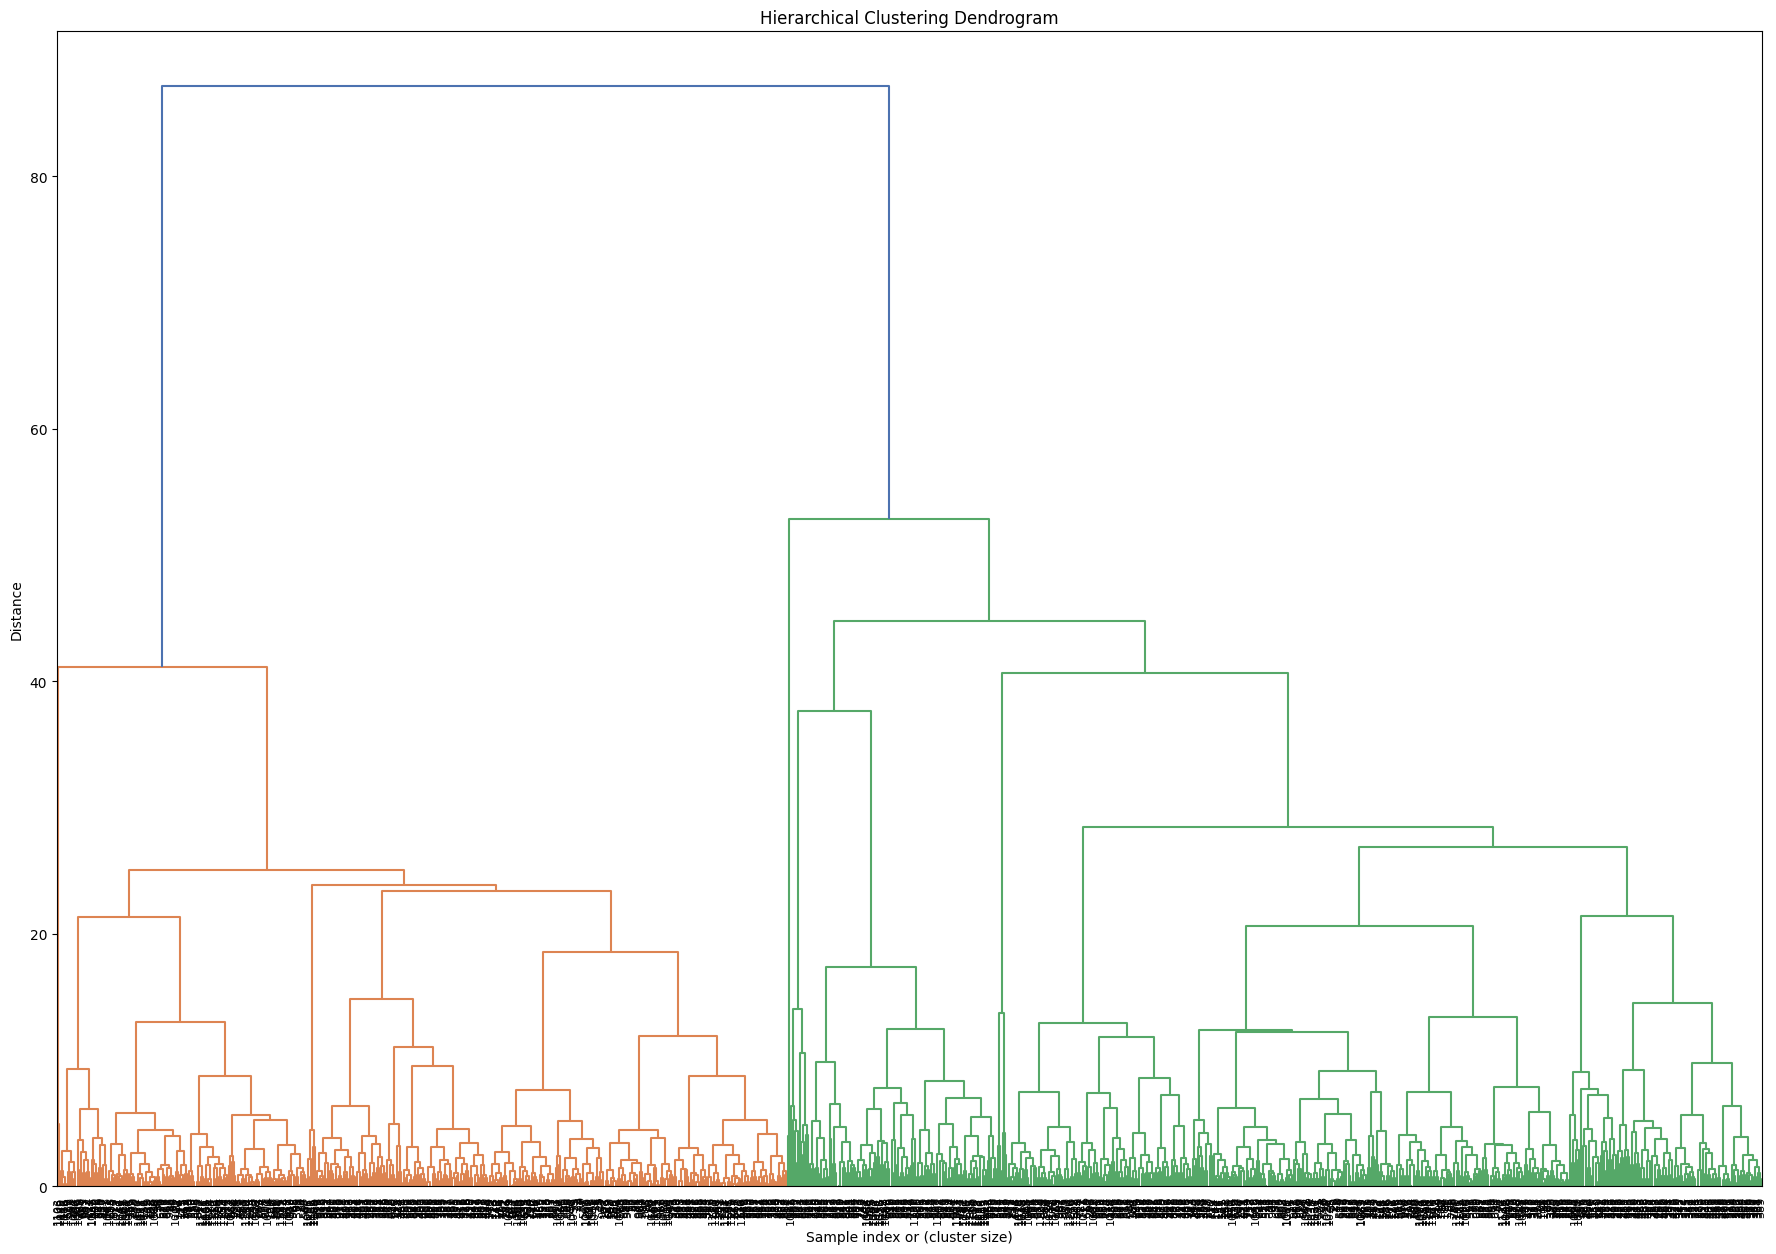

For n_clusters = 2, the average silhouette_score is: 0.308

For n_clusters = 3, the average silhouette_score is: 0.314

For n_clusters = 4, the average silhouette_score is: 0.308

For n_clusters = 5, the average silhouette_score is: 0.314

For n_clusters = 6, the average silhouette_score is: 0.319

For n_clusters = 7, the average silhouette_score is: 0.316

For n_clusters = 8, the average silhouette_score is: 0.224

For n_clusters = 9, the average silhouette_score is: 0.230

For n_clusters = 10, the average silhouette_score is: 0.174

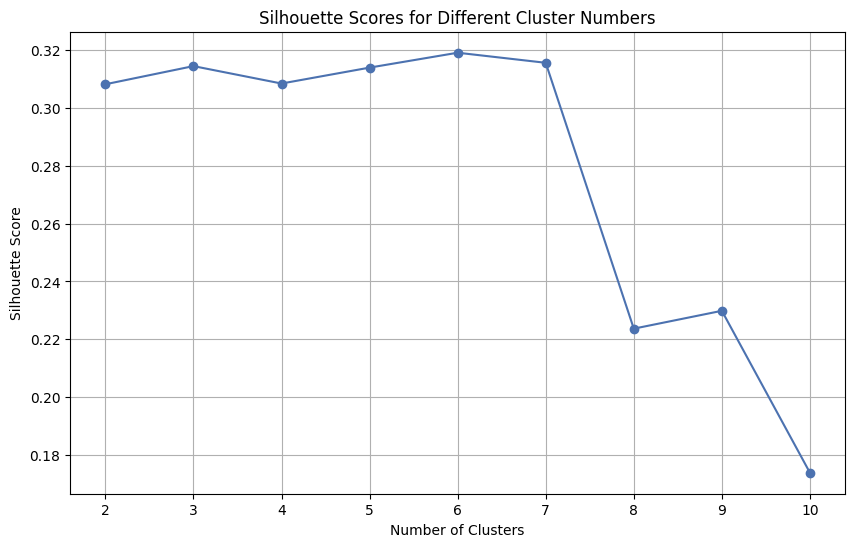

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform Agglomerative Hierarchical Clustering
Z = linkage(X_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(22, 15))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index or (cluster size)')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90., leaf_font_size=8., show_contracted=True)
plt.show()

# Determine the optimal number of clusters using Silhouette Analysis
silhouette_scores = []
for n_cluster in range(2, 11):
    clusterer = AgglomerativeClustering(n_clusters=n_cluster, metric='euclidean', linkage='ward')
    cluster_labels = clusterer.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_cluster}, the average silhouette_score is: {silhouette_avg:.3f}")

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Cluster Numbers')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

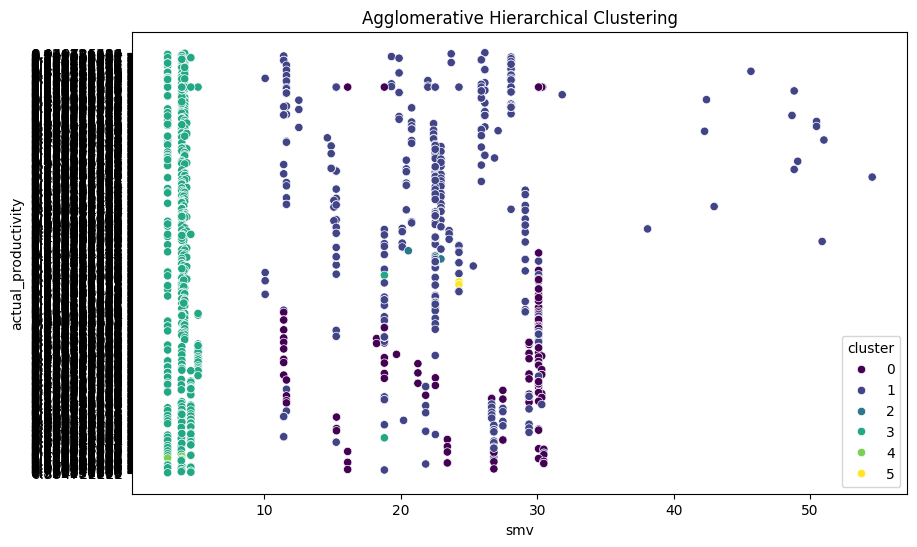

Silhouette Score: 0.319038662297774

In [ ]:
# Apply Agglomerative Hierarchical Clustering with the optimal number of clusters
optimal_clusters = 6
clusterer = AgglomerativeClustering(n_clusters=optimal_clusters, metric='euclidean', linkage='ward')
cluster_labels = clusterer.fit_predict(X_scaled)

# Add the cluster labels to the original dataframe
df['cluster'] = cluster_labels

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='smv', y='actual_productivity', hue='cluster', data=df, palette='viridis')
plt.title('Agglomerative Hierarchical Clustering')
plt.show()

# Evaluate the clusters
print('Silhouette Score:', silhouette_score(X_scaled, cluster_labels))


In [ ]:
# Import necessary libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


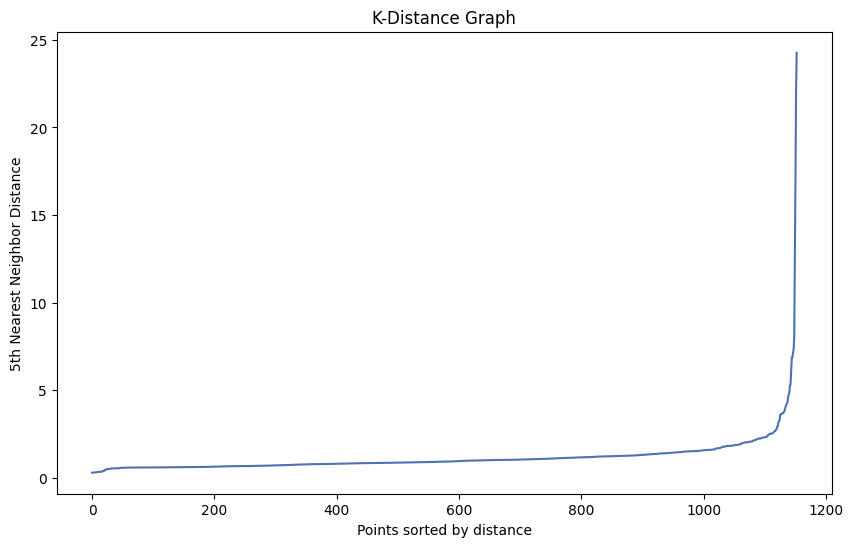

In [ ]:
# Determine the optimal eps value using the k-distance graph
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)
distances = np.sort(distances[:, 4], axis=0)

plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('K-Distance Graph')
plt.xlabel('Points sorted by distance')
plt.ylabel('5th Nearest Neighbor Distance')
plt.show()

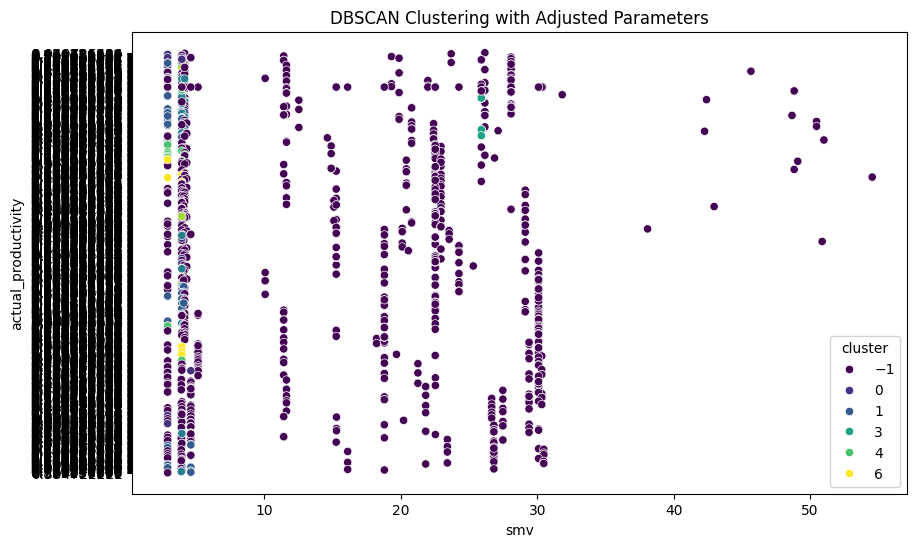

Silhouette Score: -0.29579042947196266

Estimated number of clusters: 7

Estimated number of noise points: 988

In [ ]:
# Apply DBSCAN clustering with different parameters
dbscan = DBSCAN(eps=0.7, min_samples=10, metric='euclidean')
cluster_labels = dbscan.fit_predict(X_scaled)

# Add the cluster labels to the original dataframe
df['cluster'] = cluster_labels

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='smv', y='actual_productivity', hue='cluster', data=df, palette='viridis')
plt.title('DBSCAN Clustering with Adjusted Parameters')
plt.show()

# Evaluate the clusters
if len(set(cluster_labels)) > 1:
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print('Silhouette Score:', silhouette_avg)
else:
    print('Silhouette score is not defined for the current clustering result.')

# Number of clusters and noise points
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
n_noise = list(cluster_labels).count(-1)

print('Estimated number of clusters:', n_clusters)
print('Estimated number of noise points:', n_noise)


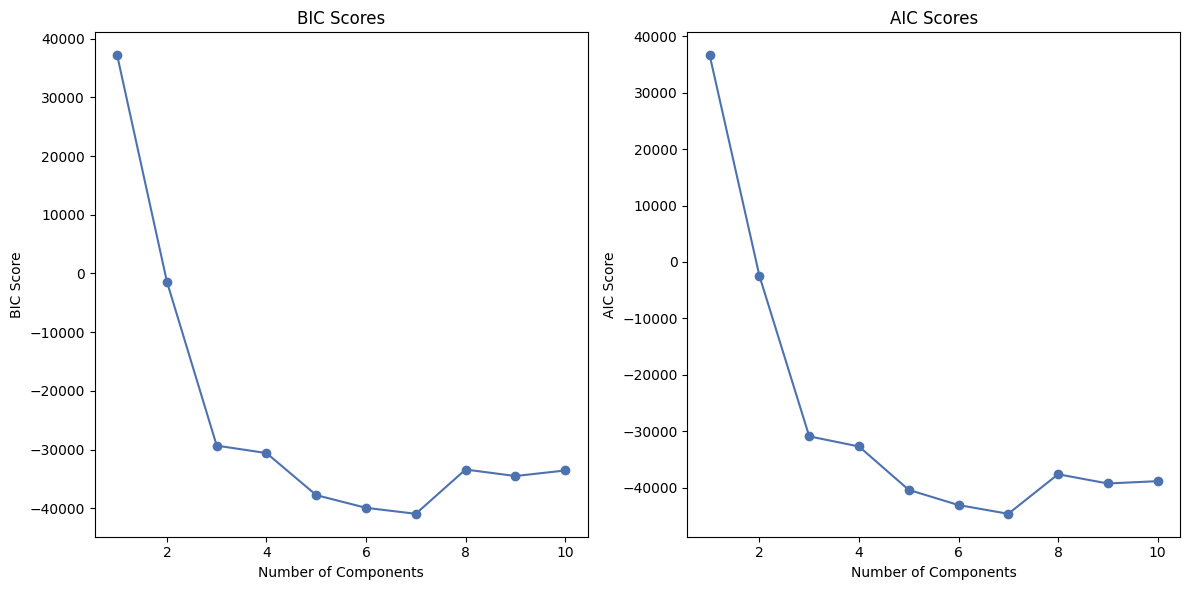

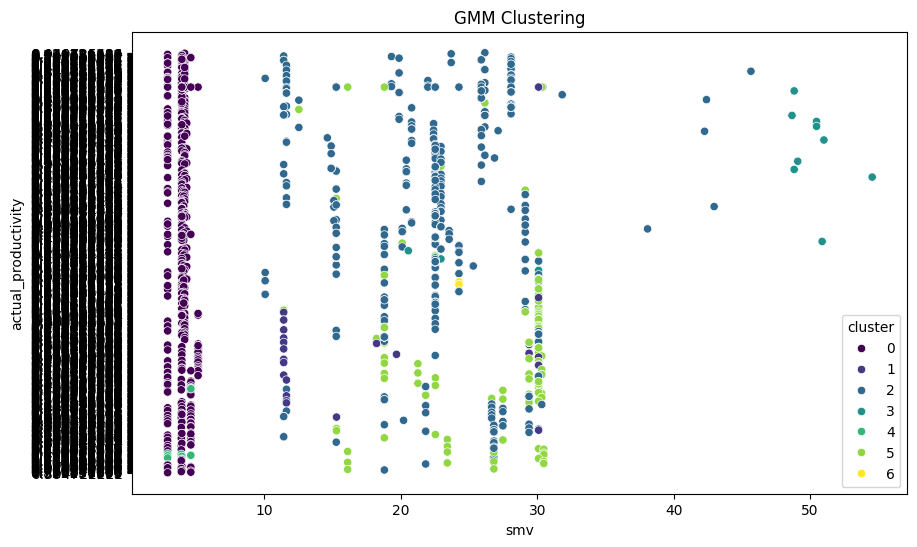

Silhouette Score: 0.2898947341194074

Estimated number of clusters: 7

In [ ]:
# Import necessary libraries
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of components using BIC and AIC
n_components_range = range(1, 11)
bic_scores = []
aic_scores = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(X_scaled)
    bic_scores.append(gmm.bic(X_scaled))
    aic_scores.append(gmm.aic(X_scaled))

# Plot BIC and AIC scores
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(n_components_range, bic_scores, marker='o')
plt.title('BIC Scores')
plt.xlabel('Number of Components')
plt.ylabel('BIC Score')

plt.subplot(1, 2, 2)
plt.plot(n_components_range, aic_scores, marker='o')
plt.title('AIC Scores')
plt.xlabel('Number of Components')
plt.ylabel('AIC Score')

plt.tight_layout()
plt.show()

# Apply GMM clustering with the optimal number of components
optimal_components = np.argmin(bic_scores) + 1  # Using BIC to determine the optimal number of components
gmm = GaussianMixture(n_components=optimal_components, random_state=42)
cluster_labels = gmm.fit_predict(X_scaled)

# Add the cluster labels to the original dataframe
df['cluster'] = cluster_labels

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='smv', y='actual_productivity', hue='cluster', data=df, palette='viridis')
plt.title('GMM Clustering')
plt.show()

# Evaluate the clusters
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print('Silhouette Score:', silhouette_avg)

# Print the number of clusters
print('Estimated number of clusters:', optimal_components)
